In [2]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import os
import imageio

gdal.UseExceptions()

In [9]:
# Copied the LANDFIRE disturbance stack to the instance
os.listdir("/home/jovyan/data/Disturbance")

['SR_landfire_fire_events_cbi_bc.tif',
 'drought',
 'dist_stack_Southern_Rockies.tif',
 'simple_dist_stack_Southern_Rockies.tif',
 'LF_Public_Events_1999_2022',
 'disturbance_stack_southern_rockies_EPSG32613.tif']

In [6]:
# Read the data
path = "/home/jovyan/data/Disturbance"
ds = gdal.Open(f'{path}/disturbance_stack_southern_rockies_EPSG32613.tif', gdal.GA_ReadOnly)

In [7]:
# For each band (year), get the numpy array
img_arrays = []
for y in range(1,23):
    rb = ds.GetRasterBand(y)
    img_arrays.append(rb.ReadAsArray())

In [16]:
# These different values correspond to disturbance type (if any) and drought level. 255 is for no data.
np.unique(img_arrays[-1])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15, 255], dtype=uint8)

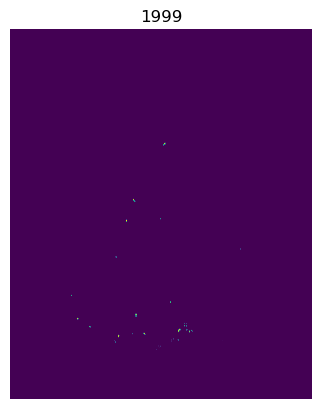

In [107]:
# Animation
fig, ax = plt.subplots()
fire = np.logical_or(img_arrays[0] == 1, img_arrays[0] == 4)
img = ax.imshow(fire)
ax.axis('off')

def update(frame):

    # NOTE: This condition is for when I had the 'simple' file loaded.
    fire = np.logical_or(img_arrays[frame] == 1, img_arrays[frame] == 4)
    
    img.set_data(fire)
    ax.set_title(frame + 1999)
    return img

ani = FuncAnimation(fig, update, frames=[*range(22)])
HTML(ani.to_jshtml())

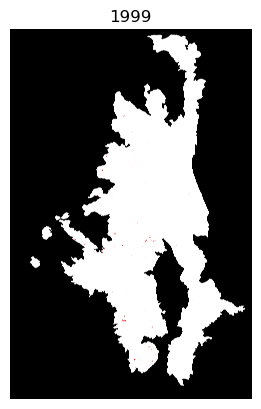

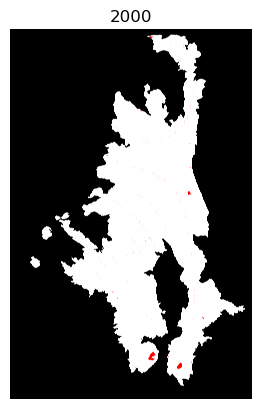

In [13]:
# Make individual year images
for i, df in enumerate(img_arrays[:2]):
    
    result = np.zeros((df.shape[0], df.shape[1], 3)) # Start with all pixels black
    no_data = df == 255
    fire_mask = np.logical_or(np.logical_or(df == 1, df == 5, df == 9), df == 13)
    blank = np.logical_and(~no_data, ~fire_mask)
    
    result[blank] = np.array([1,1,1])     # Makes non-fire pixels white
    result[fire_mask] = np.array([1,0,0]) # Makes fire pixels red
    
    fig, ax = plt.subplots()
    img = ax.imshow(result)
    ax.axis('off')
    ax.set_title(str(i+1999))
    
    plt.savefig(f"fire_{i+1999}.png")

In [16]:
# List images
files = sorted([f for f in os.listdir(os.getcwd()) if f.endswith(".png")])

In [15]:
# Make a GIF
images = []
for filename in files:
    images.append(imageio.imread(filename))
imageio.mimsave('fires_1999-2020.gif', images, duration=500)

/tmp/ipykernel_3383/2599038372.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [120]:
import rioxarray

In [121]:
xds = rioxarray.open_rasterio(f'{path}/simple_dist_stack_Southern_Rockies.tif')

In [142]:
xds.shape

(22, 28057, 16339)

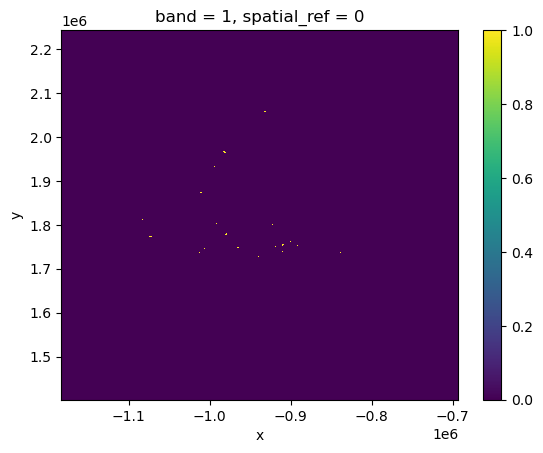

In [143]:
(xds[0] == 1).plot()

In [141]:
xds[0]

<xarray.DataArray (y: 28057, x: 16339)>
[458423323 values with dtype=uint8]
Coordinates:
    band         int64 1
  * x            (x) float64 -1.183e+06 -1.183e+06 ... -6.932e+05 -6.932e+05
  * y            (y) float64 2.243e+06 2.243e+06 ... 1.402e+06 1.402e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  1
    STATISTICS_MEAN:     -9999
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   -9999
    _FillValue:          255
    scale_factor:        1.0
    add_offset:          0.0
    long_name:           ('forest-disturbance1999', 'forest-disturbance2000',...

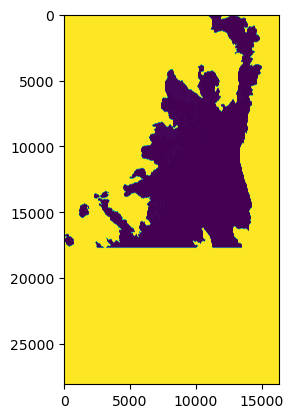

In [47]:
plt.imshow(img_array21)

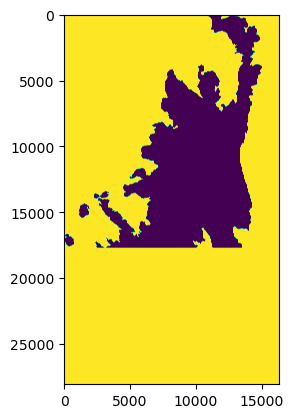

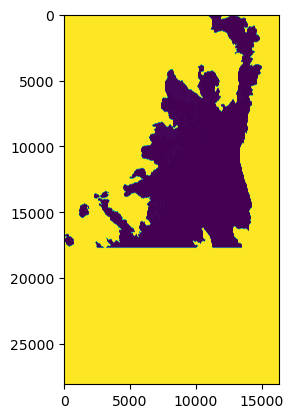

In [45]:
plt.imshow(img_array1)
plt.show()

plt.imshow(img_array2)
plt.show()